In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,4)})
%matplotlib inline

In [2]:
d="2020-10-01"

In [3]:
ws=[]
wd=[]
m=[]
for x in range(144):
    ws.append(np.random.uniform(0,25.5))
    wd.append(np.random.uniform(0,360))
    m.append(d)    

In [4]:
data=np.concatenate([np.array(ws).reshape(144,1),np.array(wd).reshape(144,1),np.array(m).reshape(144,1)],1)

In [5]:
df1=pd.DataFrame(data=data,columns=["Wind Speed","Wind direction","Date/Time"])


In [6]:
x=0
y=0
def date_time(t):
        global x
        global y
        t=t + " "+ str(y)+":"+str(x*10)+":"+"00"
        if x<5:
            x=x+1
        else:
            x=0
            y=y+1
        return t    
df1["Date/Time"]=df1["Date/Time"].apply(date_time,1)            

In [7]:
df1[['date','time']] = df1['Date/Time'].str.split(expand=True)
df1['Date/Time'] = (pd.to_datetime(df1.pop('date'), format='%Y/%m/%d') + 
                  pd.to_timedelta(df1.pop('time') ))

In [8]:
df1=df1.set_index("Date/Time")
df1["Year"]=df1.index.year
df1["Month"]=df1.index.month
df1["Weekday"]=df1.index.weekday

In [9]:
df1.head()

,Wind Speed,Wind direction,Year,Month,Weekday
Date/Time,,,,,
2020-10-01 00:00:00,4.362751667587849,175.5311260449454,2020,10,3
2020-10-01 00:10:00,2.904669737798097,287.4706508953748,2020,10,3
2020-10-01 00:20:00,3.487845071563654,17.623910423619556,2020,10,3
2020-10-01 00:30:00,9.369652548043948,111.61768972968494,2020,10,3
2020-10-01 00:40:00,10.257685880050005,93.34439824774698,2020,10,3


In [10]:
X1=df1[["Wind Speed","Wind direction"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X1)
scaled_data=scaler.transform(X1)

In [11]:
import joblib
tpc=joblib.load('Wind Turbine(TPC).sav').predict(scaled_data)
tpc.shape

(144,)

In [12]:
df1["Theoretical_Power_Curve (KWh)"]=tpc

In [13]:
df1.head()

,Wind Speed,Wind direction,Year,Month,Weekday,Theoretical_Power_Curve (KWh)
Date/Time,,,,,,
2020-10-01 00:00:00,4.362751667587849,175.5311260449454,2020,10,3,0.000000
2020-10-01 00:10:00,2.904669737798097,287.4706508953748,2020,10,3,0.000000
2020-10-01 00:20:00,3.487845071563654,17.623910423619556,2020,10,3,0.000000
2020-10-01 00:30:00,9.369652548043948,111.61768972968494,2020,10,3,448.672003
2020-10-01 00:40:00,10.257685880050005,93.34439824774698,2020,10,3,609.726611


In [14]:
X2=df1[["Wind Speed","Theoretical_Power_Curve (KWh)","Month"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X2)
scaled_data=scaler.transform(X2)

X2=df1[["Wind Speed","Wind direction","Month"]]

In [15]:
import joblib
lv=joblib.load('Wind Turbine(LV).sav').predict(scaled_data)
lv.shape

(144,)

In [16]:
df1["LV ActivePower (kW)"]=lv
df1

,Wind Speed,Wind direction,Year,Month,Weekday,Theoretical_Power_Curve (KWh),LV ActivePower (kW)
Date/Time,,,,,,,
2020-10-01 00:00:00,4.362751667587849,175.5311260449454,2020,10,3,0.000000,1.091790e-02
2020-10-01 00:10:00,2.904669737798097,287.4706508953748,2020,10,3,0.000000,4.016993e-08
2020-10-01 00:20:00,3.487845071563654,17.623910423619556,2020,10,3,0.000000,4.781280e-08
2020-10-01 00:30:00,9.369652548043948,111.61768972968494,2020,10,3,448.672003,4.064526e+02
2020-10-01 00:40:00,10.257685880050005,93.34439824774698,2020,10,3,609.726611,4.815023e+02
...,...,...,...,...,...,...,...
2020-10-01 23:10:00,22.37911725980083,307.175936191796,2020,10,3,3600.000000,3.277858e+03
2020-10-01 23:20:00,7.981267413924577,13.943530779781423,2020,10,3,244.724226,2.028414e+02
2020-10-01 23:30:00,4.3982250163439085,348.5911402263204,2020,10,3,0.000000,0.000000e+00


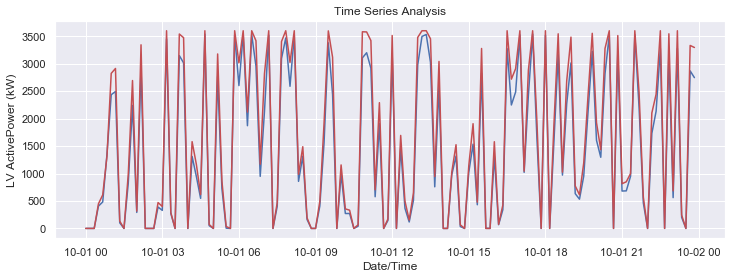

In [17]:
fig, axes = plt.subplots(figsize=(12,4))
x=df1.index
y=df1["LV ActivePower (kW)"].values
z=df1["Theoretical_Power_Curve (KWh)"].values
axes.plot(x, y, 'b')
axes.plot(x,z,"r")
axes.set_ylabel('LV ActivePower (kW)')
axes.set_xlabel('Date/Time')
axes.set_title('Time Series Analysis')
plt.savefig("Time Series Analysis.png")